
# 1.&nbsp;Copper Notebook
This is a compilation of our understanding of copper commodity after analyzing the data that is available openly on the internet and data that was obtained through the Bloomberg terminal. This document highlights all the important fundamental information that we found and then tries to develope technical tools that could be used to make a more informed trades.

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Note</h3>

*   Please use this notebook to get a better understanding of the metal and to make a better-informed trade
*   Please don't trade based solely on the technical analysis found here
*   Please consider this a guideline and never as an absolute fact.

</div>

Table of contents


In [ ]:
!pip install tensorflow
!pip install pandas
!pip install matplotlib

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np


# 2.&nbsp; Fundamental analysis

In this section we are trying to see if there is any obvious patters in the data based on suppy and demand factors. Please use this section to understand about the demand and supply of copper.

In [ ]:
fundamentals = pd.read_csv('copper_supply_demand.csv').drop(columns=['Ticker','Field ID', 'Field Mnemonic', 'Data State', '2024'])
production = fundamentals.iloc[0:31]
production.columns = fundamentals.columns
refined = fundamentals.iloc[34:68]
refined.columns = fundamentals.columns
demand = fundamentals.iloc[71:109]
demand.columns = fundamentals.columns

<Axes: title={'center': 'Stacked Bar Graph by dataframe'}, xlabel='Time', ylabel='Production in '>

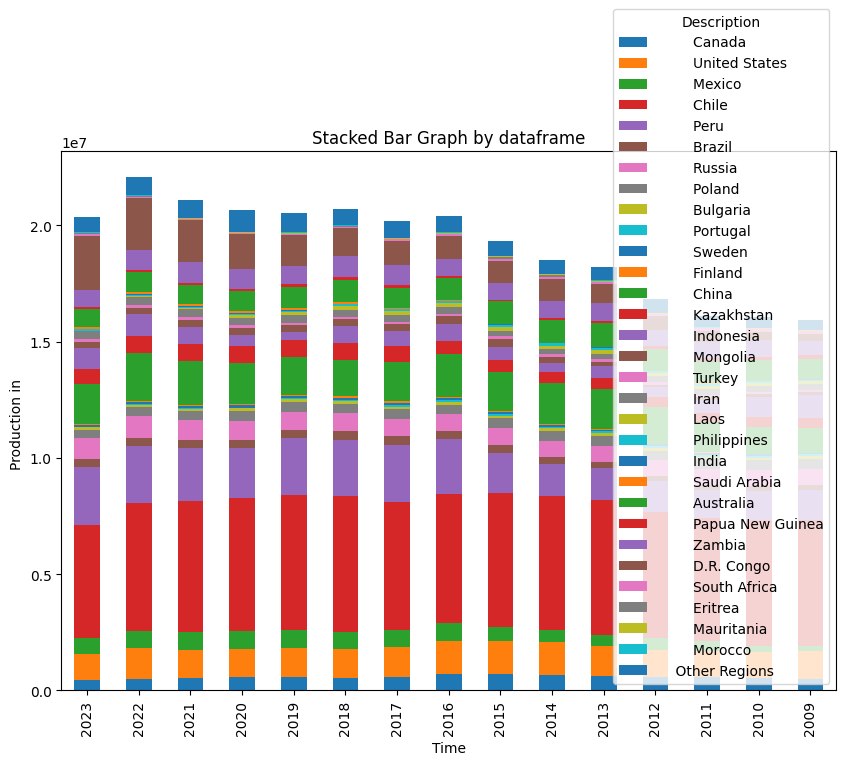

In [ ]:
production_transposed = production.set_index('Description').transpose().reset_index()
production_transposed.plot(x="index", kind='bar', stacked=True,
                           title='Stacked Bar Graph by dataframe', figsize=(10,7),
                           xlabel="Time", ylabel="Production in ")
# fig.update_layout(legend_traceorder="reversed")s

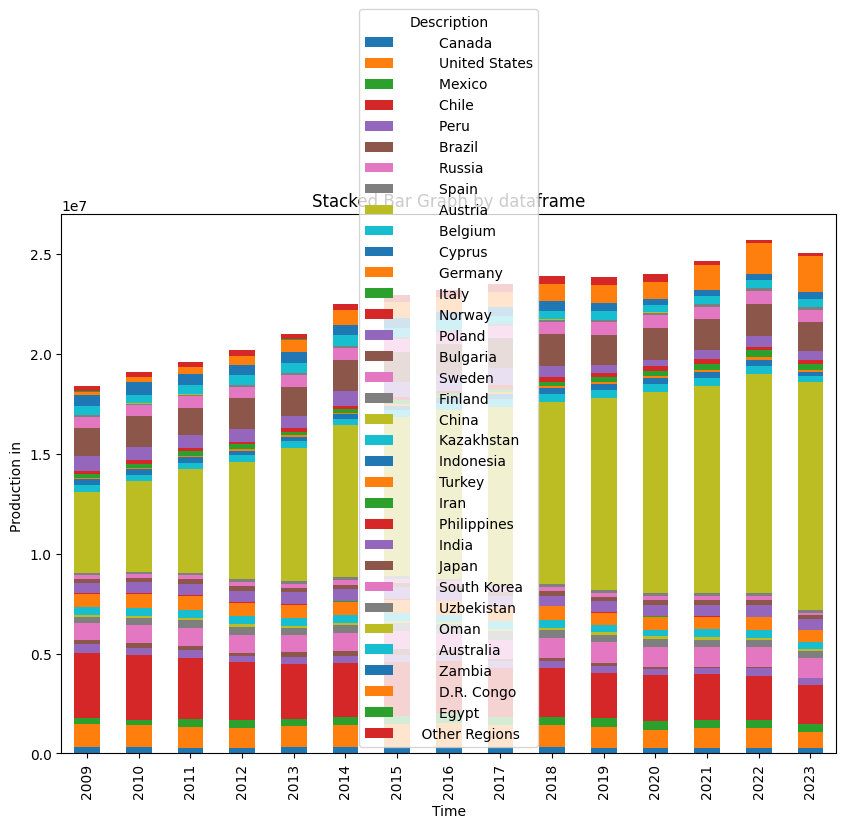

In [ ]:
refined_transposed = refined.set_index('Description').transpose().reset_index()
refined_transposed.plot(x="index", kind='bar', stacked=True,
                           title='Stacked Bar Graph by dataframe', figsize=(10,7),
                           xlabel="Time", ylabel="Production in ").invert_xaxis()

The comclusions that i can make are:

- The supply of copper(raw) does not get effected by any first world country's monitary supply.
- China imports alot of copper(raw) from chile and peru and so we can say that trade traffics and other trade restrictions of any firstworld country will not have an effect on copper.
- The supply of copper changed in long term but it is priced in by the time any future contract is available for it.  

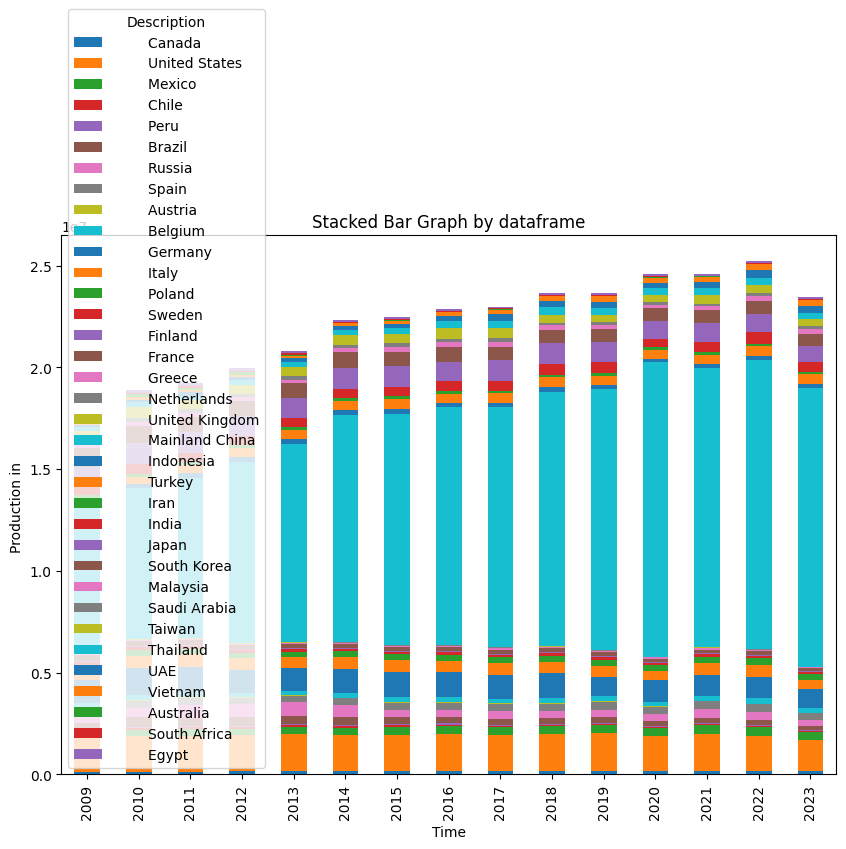

In [ ]:
demand_transposed = demand.set_index('Description').transpose().reset_index()
demand_transposed.plot(x="index", kind='bar', stacked=True,
                           title='Stacked Bar Graph by dataframe', figsize=(10,7),
                           xlabel="Time", ylabel="Production in ").invert_xaxis()

We can safely say that trades can be made solely on the demand of china from here. Because the supply is long term and the demand is medium term, most of price movement is highly correlated to the change in demand.

# 3.&nbsp; Macro Factors Analysis.

This section deals with testing different monitarty effects on the price of copper.



In [ ]:
# production, refined, demand # are the variable that you can use
usd_dxy = pd.read_csv('usdollarstrength.csv')
copper_price = pd.read_csv('copperprice.csv')


# 4.&nbsp; China Economy on Copper Price

This section comprises of a non-recursive neural network with tensorflow to better quantify the relationship between the Chineese economy and the CPER ETF price.  

Not finished will work on more...

In [ ]:
# Filter through dataframe and create test and train data.
copper = pd.read_csv('/Copper.csv')
copper.fillna(0)
#print(copper.head())

#copper = clean_dataframe(copper_imported)

# Splitting the DataFrame into train and test sets 50/50

train_df, test_df = train_test_split(copper, test_size=0.5, random_state=42)

# Creating x_train, y_train, x_test, y_test variables

x_train = train_df[['China M2 Monthly Money Supply', 'Money Supply Percent YoY', 'Volume']].values
y_train = train_df[['High', 'Low ']].values

x_test = test_df[['China M2 Monthly Money Supply', 'Money Supply Percent YoY', 'Volume']].values
y_test = test_df[['High', 'Low ']].values

print(x_train.type())


AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# Feed forward, sequential NN.  Input layer of 5 features, 3 hidden layers, and an output of 1 node.
# Uses a RELU method for activation gradient, MSE for loss calculation and ADAM for loss optimization

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, ctivation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu')
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
2/2 [==============================] - 1s 10ms/step - loss: 0.2085
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1675
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1188
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0782
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0622
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0715
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0646
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0540
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0556
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0569
Epoch 11/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0569
Epoch 12/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0542
Epoch 13/50
2/2 [==============================] - 0s 7ms/step - loss: 0

In [ ]:
print("Evaluate Model: \n")
model.evaluate(x_test, y_test, verbose=1)



Evaluate Model: 

2/2 [==============================] - 0s 7ms/step - loss: 0.0488
Evaluate Model: 0.04880126193165779


0.055193062871694565

In [ ]:
  x_new = [[1, 1, 1]]
  predictions = model.predict(x_new) # Predict

  # De-normalize output
  upper = ((int(predictions[0][0])) * (30.12- 14.28)) + 14.28
  lower  = ((int(predictions[0][1])) * (27.56 - 12.87 )) + 12.87

  print("High: $", upper)
  print("Low: $", lower)


1/1 [==============================] - 0s 33ms/step
High: $ 30.12
Low: $ 27.56
